In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv").iloc[:,[0, 1, 2, -3]]
df['DATE'] = pd.to_datetime(df['DATE'])

In [22]:
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


In [23]:
df['OPINION'].value_counts()

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

We would know if Opinion is a good indicator.
We want to draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Green for the good and very good points
- Red for the bad and very bad points
- Yellow for the not good not bad points

## Scatterplot #1

We group the opinions into 3 groups

In [53]:
df['group'] = df['OPINION'].apply(lambda x: 'good & very good' if x == 'good' or x == 'very good' else ('bad & very bad' if x == 'bad' or x == 'very bad' else x))
df['group'].value_counts()

bad & very bad      192
good & very good     97
not good not bad     76
Name: group, dtype: int64

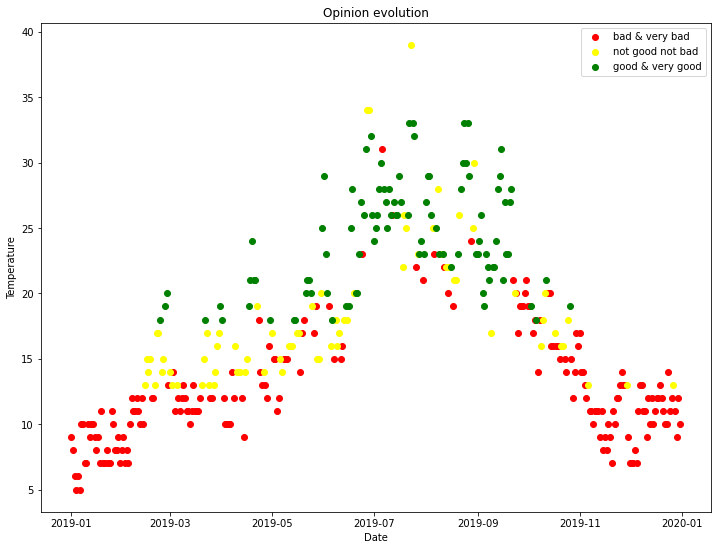

In [55]:
op = df['group'].unique()
col = {'bad & very bad' : 'red', 'not good not bad' : 'yellow', 'good & very good': 'green'}

plt.figure(figsize=(12,9))
for i in op:
  x = df.loc[df['group'] == i]['DATE']
  y = df.loc[df['group'] == i]['MAX_TEMPERATURE_C']
  plt.scatter(x, y, label = i, c=col[i])

plt.legend() 
plt.title('Opinion evolution')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

##Scatterplot 2

Without grouping opinions: matplotlib.patches

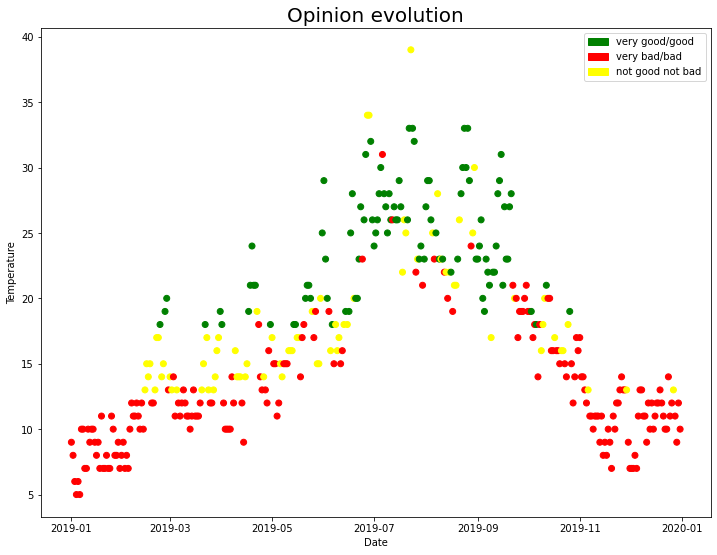

In [52]:
import matplotlib.patches as patches

colors = {'very good':'green', 'good':'green', 'very bad':'red', 'bad':'red', 'not good not bad':'yellow'}
good = patches.Patch(color='green', label='very good/good')
notgood = patches.Patch(color='red', label='very bad/bad')
soso = patches.Patch(color='yellow', label= 'not good not bad')

fig, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=df["DATE"], y=df["MAX_TEMPERATURE_C"], c=df["OPINION"].apply(lambda x: colors[x]))
plt.legend(handles=[good, notgood, soso])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Opinion evolution', fontsize=20)

plt.show()